# Model creation and accuracy caheck for the Design-3 data
 


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd . read_csv(("D:\Git_Hub\BreakPad_Pressure_distribution_using_ML\Raw_Input_Data\Design3.csv"))
df = df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"])
df["Youngs_Modulus"]=df["Youngs_Modulus"]*100
df.head() 

,1,2,3,4,5,6,7,8,9,10,...,881,882,883,Design,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,3.03529,2.77816,2.87428,2.91099,2.83873,3.04644,3.06054,2.85533,2.70687,2.97928,...,2.00554,2.47561,2.14680,Design_3,7.5,29.3,86.8,15,100,50.0
1,3.69427,3.32636,3.42784,3.47344,3.40254,3.63862,3.64998,3.40499,3.24040,3.62962,...,2.42613,3.05143,2.58307,Design_3,7.5,29.3,86.8,15,100,60.0
2,4.35952,3.87161,3.97711,4.03254,3.96634,4.22788,4.23527,3.95046,3.77131,4.28752,...,2.84922,3.64057,3.01981,Design_3,7.5,29.3,86.8,15,100,70.0
3,5.02992,4.41437,4.52290,4.58897,4.53020,4.81483,4.81727,4.49261,4.30008,4.95173,...,3.27418,4.24038,3.45687,Design_3,7.5,29.3,86.8,15,100,80.0
4,5.70482,4.95517,5.06598,5.14343,5.09436,5.40010,5.39679,5.03221,4.82722,5.62146,...,3.70074,4.84916,3.89419,Design_3,7.5,29.3,86.8,15,100,90.0


## EDA

In [3]:
df.shape

(150, 812)

In [4]:
#check for duplicates
df.duplicated().value_counts()

False    150
dtype: int64

In [5]:
#check for any missing values
for all in df:
    x=all
    if(pd.isnull(df[x]).any()==False):
        continue
    else:
        print(x+' has null')

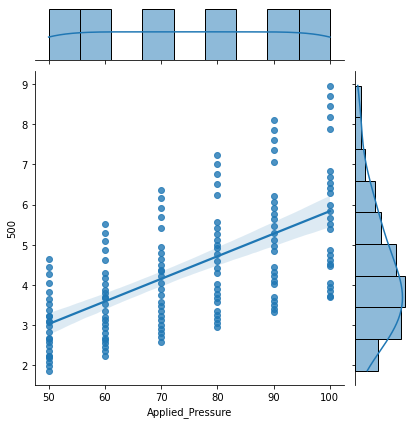

In [7]:
### Bivariant analysis
sns.jointplot(x='Applied_Pressure', y='500', data=df, kind='reg')

<AxesSubplot:xlabel='Applied_Pressure', ylabel='800'>

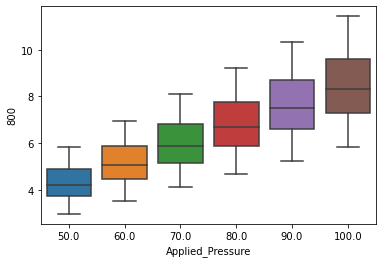

In [8]:
sns.boxplot(x= 'Applied_Pressure',y='800',data=df)

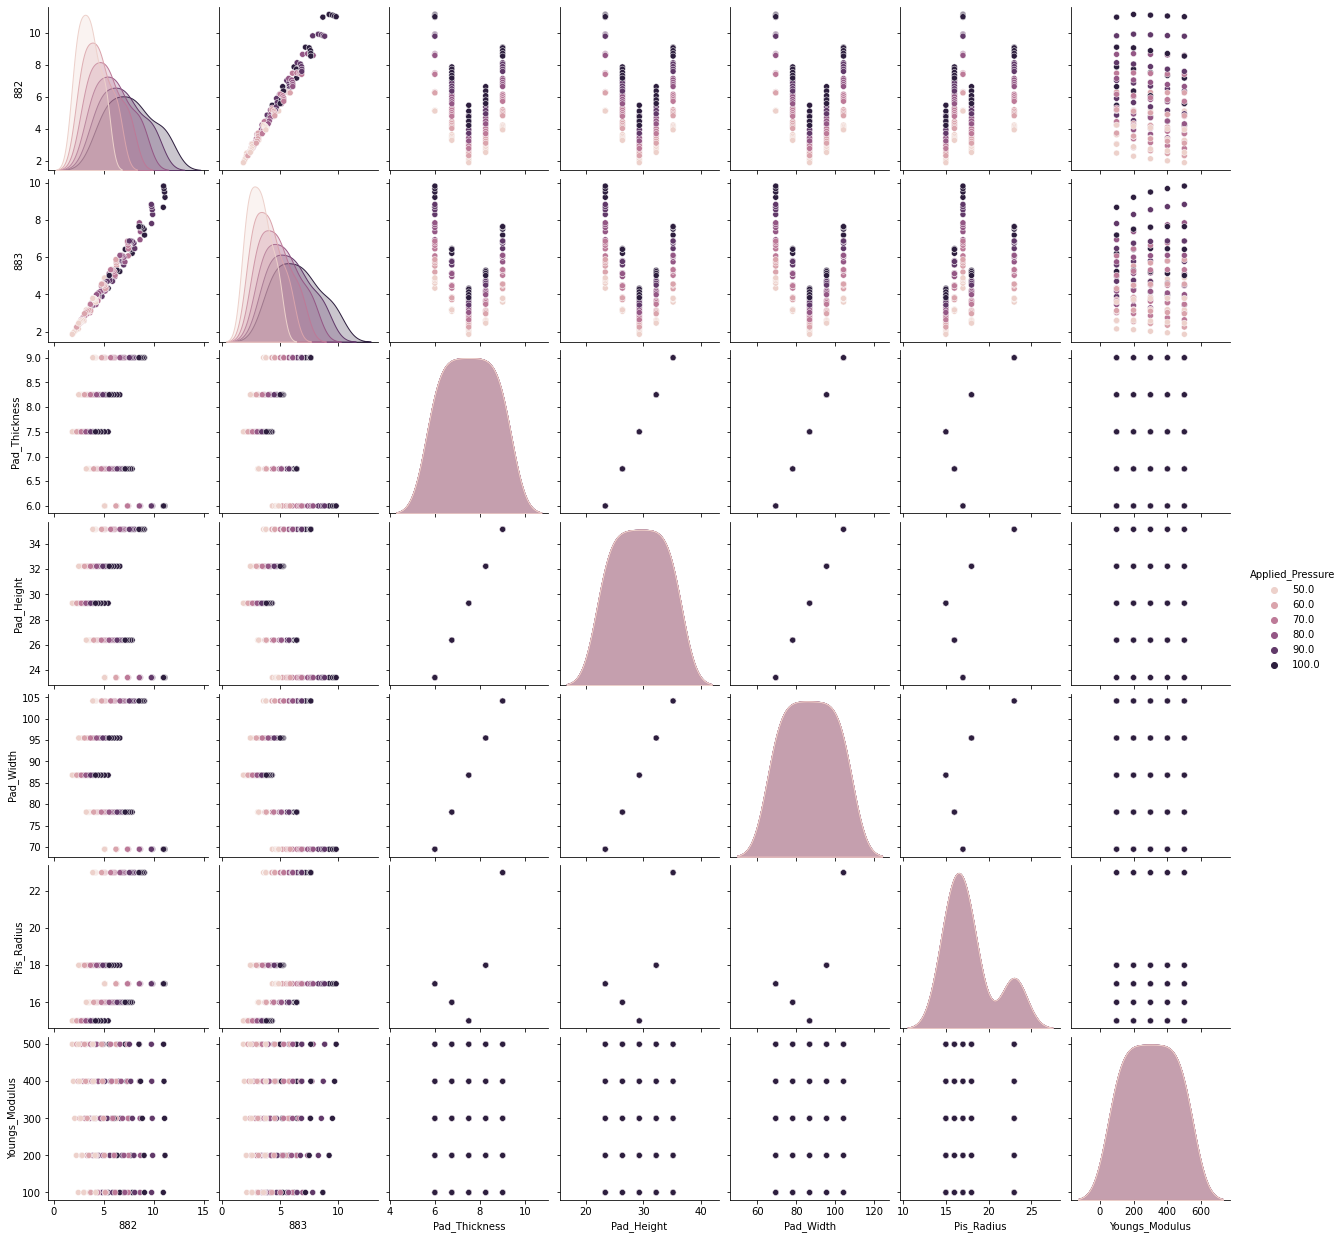

In [13]:
df_2=df
df_2 = df_2.iloc[:,803:]
df_2 = df_2.drop(columns='Design')
sns.pairplot(df_2,hue='Applied_Pressure')

## Feature Selection

In [14]:
x_features = df.iloc[:,806:]
print(x_features.dtypes)
x_features.head(12)

Pad_Thickness       float64
Pad_Height          float64
Pad_Width           float64
Pis_Radius            int64
Youngs_Modulus        int64
Applied_Pressure    float64
dtype: object


,Pad_Thickness,Pad_Height,Pad_Width,Pis_Radius,Youngs_Modulus,Applied_Pressure
0,7.5,29.3,86.8,15,100,50.0
1,7.5,29.3,86.8,15,100,60.0
2,7.5,29.3,86.8,15,100,70.0
3,7.5,29.3,86.8,15,100,80.0
4,7.5,29.3,86.8,15,100,90.0
5,7.5,29.3,86.8,15,100,100.0
6,7.5,29.3,86.8,15,200,50.0
7,7.5,29.3,86.8,15,200,60.0
8,7.5,29.3,86.8,15,200,70.0
9,7.5,29.3,86.8,15,200,80.0


In [15]:
y_targets = df.iloc[:,:805]
print(y_targets.dtypes.value_counts())
y_targets.head(12)

float64    805
dtype: int64


,1,2,3,4,5,6,7,8,9,10,...,871,875,876,877,878,879,880,881,882,883
0,3.03529,2.77816,2.87428,2.91099,2.83873,3.04644,3.06054,2.85533,2.70687,2.97928,...,1.37971,2.83612,3.20441,3.39963,3.24699,2.04816,2.06570,2.00554,2.47561,2.14680
1,3.69427,3.32636,3.42784,3.47344,3.40254,3.63862,3.64998,3.40499,3.24040,3.62962,...,1.62792,3.39254,3.88686,4.15939,3.94920,2.44906,2.47893,2.42613,3.05143,2.58307
2,4.35952,3.87161,3.97711,4.03254,3.96634,4.22788,4.23527,3.95046,3.77131,4.28752,...,1.87605,3.94773,4.57925,4.93673,4.66300,2.84803,2.89157,2.84922,3.64057,3.01981
3,5.02992,4.41437,4.52290,4.58897,4.53020,4.81483,4.81727,4.49261,4.30008,4.95173,...,2.12463,4.50203,5.28019,5.72894,5.38654,3.24546,3.30367,3.27418,4.24038,3.45687
4,5.70482,4.95517,5.06598,5.14343,5.09436,5.40010,5.39679,5.03221,4.82722,5.62146,...,2.37389,5.05587,5.98882,6.53423,6.11869,3.64156,3.71531,3.70074,4.84916,3.89419
5,6.38393,5.49451,5.60696,5.69643,5.65905,5.98419,5.97441,5.56985,5.35314,6.29617,...,2.62408,5.60963,6.70457,7.35130,6.85865,4.03655,4.12658,4.12873,5.46542,4.33179
6,3.21776,3.10095,3.24880,3.28989,3.16256,3.42149,3.45199,3.22540,3.02574,3.15594,...,1.30217,3.18667,3.45630,3.56724,3.45973,1.96189,1.98499,1.91985,2.28078,2.10226
7,3.92007,3.71923,3.87948,3.92735,3.78581,4.08760,4.12080,3.85119,3.62729,3.84527,...,1.50941,3.80922,4.17414,4.33826,4.18797,2.35162,2.38766,2.32784,2.81512,2.53420
8,4.63096,4.33486,4.50518,4.56043,4.40819,4.74989,4.78447,4.47197,4.22621,4.54394,...,1.70659,4.42943,4.90069,5.12599,4.92721,2.74018,2.79087,2.74017,3.36601,2.96792
9,5.34871,4.94794,5.12653,5.18981,5.02998,5.40894,5.44372,5.08839,4.82268,5.25033,...,1.89555,5.04780,5.63535,5.92893,5.67648,3.12762,3.19442,3.15606,3.93104,3.40303


In [16]:
print(x_features.shape,y_targets.shape)

(150, 6) (150, 805)


## Model Building with mutiple target

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

In [18]:
x_test, x_train, y_test, y_train = train_test_split(x_features, y_targets, test_size = 0.3, random_state = 100)

### 1. MultiOutPut Regressor with Ridge estimator

In [19]:
MOR_Rd_1 = MultiOutputRegressor(Ridge(random_state=123))
MOR_Rd_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=Ridge(random_state=123))

In [20]:
print('Model_1 train score = ', MOR_Rd_1.score(x_train, y_train))
print('Model_1 test score = ', MOR_Rd_1.score(x_test, y_test))

Model_1 train score =  0.8175028655856958
Model_1 test score =  0.7815292002209615


In [21]:
MOR_Rd_Predts = MOR_Rd_1.predict(x_test)
print('mean squared error for this model is = ', metrics.mean_squared_error(y_test,MOR_Rd_Predts))

mean squared error for this model is =  0.13946021061198963


### 2. Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
DT_reg_1 = DecisionTreeRegressor(max_depth=2)
DT_reg_2 = DecisionTreeRegressor(max_depth=5)
DT_reg_3 = DecisionTreeRegressor(max_depth=8)
DT_reg_1.fit(x_train, y_train)
DT_reg_2.fit(x_train, y_train)
DT_reg_3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [24]:
DT_reg_predts_1 = DT_reg_1.predict(x_test)
DT_reg_predts_2 = DT_reg_2.predict(x_test)
DT_reg_predts_3 = DT_reg_3.predict(x_test)

In [25]:
# max depth = 1
print('Train score at max depth 2 = ', DT_reg_1.score(x_train, y_train))
print('Test score at max depth 2 = ', DT_reg_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_1))

Train score at max depth 2 =  0.5534041223036712
Test score at max depth 2 =  0.4402732788674496
MeanSquaredError for this model is =  0.8124536591544871


In [26]:
# max depth = 2
print('Train score at max depth 5 = ', DT_reg_2.score(x_train, y_train))
print('Test score at max depth 5 = ', DT_reg_2.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_2))

Train score at max depth 5 =  0.9632197110586935
Test score at max depth 5 =  0.5463669995950714
MeanSquaredError for this model is =  0.4789539488521414


In [27]:
# max depth = 8
print('Train score at max depth 8 = ', DT_reg_3.score(x_train, y_train))
print('Test score at max depth 8 = ', DT_reg_3.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test,DT_reg_predts_3))

Train score at max depth 8 =  0.9999235772146102
Test score at max depth 8 =  0.5821812819671839
MeanSquaredError for this model is =  0.40217406098322656


### 3. Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
MOR_RFR_1 = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=100))
MOR_RFR_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=100))

In [30]:
MOR_RFR_predts = MOR_RFR_1.predict(x_test)

In [31]:
print('Train score for this model = ', MOR_RFR_1.score(x_train, y_train))
print('Test score for this model = ', MOR_RFR_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, MOR_RFR_predts))

Train score for this model =  0.9695065458724731
Test score for this model =  0.860491777778416
MeanSquaredError for this model is =  0.19472583841395766


In [42]:
RF_1 = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=100)
RF_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, random_state=100)

In [43]:
RF_predts = RF_1.predict(x_test)

In [44]:
print('Train score for this model = ', RF_1.score(x_train, y_train))
print('Test score for this model = ', RF_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, RF_predts))

Train score for this model =  0.9591913308248654
Test score for this model =  0.7507793893478214
MeanSquaredError for this model is =  0.20029171375354032


#### 3.2 Regressor Chain with Random Forest 

In [45]:
from sklearn.multioutput import RegressorChain

In [46]:
#Modelwith Regressorchain
RC_RF_1 = RegressorChain(RandomForestRegressor(n_estimators=10, max_depth= 30, random_state=100))
RC_RF_1.fit(x_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(max_depth=30,
                                                    n_estimators=10,
                                                    random_state=100))

In [47]:
RC_RF_predts = RC_RF_1.predict(x_test)

In [48]:
print('Train score for this model = ', RC_RF_1.score(x_train, y_train))
print('Test score for this model = ', RC_RF_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, RC_RF_predts))

Train score for this model =  0.4335810055149219
Test score for this model =  0.5143861082859872
MeanSquaredError for this model is =  0.6299033480087017


### 4 SVM

In [49]:
from sklearn.svm import LinearSVR

In [50]:
svr = LinearSVR()
SVM_1 = MultiOutputRegressor(svr)
SVM_1.fit(x_train, y_train)

MultiOutputRegressor(estimator=LinearSVR())

In [51]:
SVM_predts = SVM_1.predict(x_test)

In [52]:
print('Train score for this model = ', SVM_1.score(x_train, y_train))
print('Test score for this model = ', SVM_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, SVM_predts))

Train score for this model =  -0.12217237131599525
Test score for this model =  0.36217496500675894
MeanSquaredError for this model is =  0.37314945877576067


### 5. XGBoost

In [53]:
import xgboost as xgb
XGB_1 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(x_train,y_train)
XGB_2 = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(x_train,y_train)

[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\

In [56]:
XGB_predts_1 = XGB_1.predict(x_test)
XGB_predts_2 = XGB_2.predict(x_test)

In [57]:
# for SquaredError model
print('Train score for this model = ', XGB_1.score(x_train, y_train))
print('Test score for this model = ', XGB_1.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, XGB_predts_1))

Train score for this model =  0.9861013887190676
Test score for this model =  0.9016629436271164
MeanSquaredError for this model is =  0.08345499164090947


In [58]:
# for Linear model
print('Train score for this model = ', XGB_2.score(x_train, y_train))
print('Test score for this model = ', XGB_2.score(x_test, y_test))
print('MeanSquaredError for this model is = ', metrics.mean_squared_error(y_test, XGB_predts_2))

Train score for this model =  0.9861013887190676
Test score for this model =  0.9016629436271164
MeanSquaredError for this model is =  0.08345499164090947


Range of input parameters

| PARAMETER | min | max | Unit |
| --------- | --- | --- | ---- |
| Pad thickness     | 6    | 9    | mm |
| Pad height        | 23.4 | 35.16 | mm |
| Pad width         | 69   | 104 |  mm |
| Piston radius     | 15   | 23  |  mm |
| Youngs_Mo         | 100  | 500 |  GPa |
| Applied _Pressure | 50   | 100 |  bar |

In [59]:
# 'Pad_Thickness', 'Pad_Height', 'Pad_Width', 'Pis_Radius', 'Youngs_Modulus', 'Applied_Pressure'
Example = [[ 8, 33, 100, 22, 450, 90 ]]

In [60]:
results = XGB_1.predict(x_test)
results = pd.DataFrame({'Pressure':results[0]})
results

,Pressure
0,3.377583
1,3.284907
2,3.189308
3,3.464309
4,3.269634
...,...
800,2.001483
801,1.978898
802,1.997913
803,2.452932


In [ ]:
# importing the coordinates data 
cordinates = pd.read_csv(r"", header=None )
cordinates = cordinates.drop(columns=0)
cordinates.head(12)